# Deepdive notebook converted to plot proper figures

In [1]:
from env_figs import Environment
from env_figs import build_and_run
from model import NN
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_returns = np.load("multi_syll_robust.npy")

In [3]:
total_returns.shape
params_path = "params.json"
with open(params_path, "r") as f:
    parameters = json.load(f)

In [4]:
np.mean(total_returns[:, 0, :], axis=0).mean()

0.9259356107610107

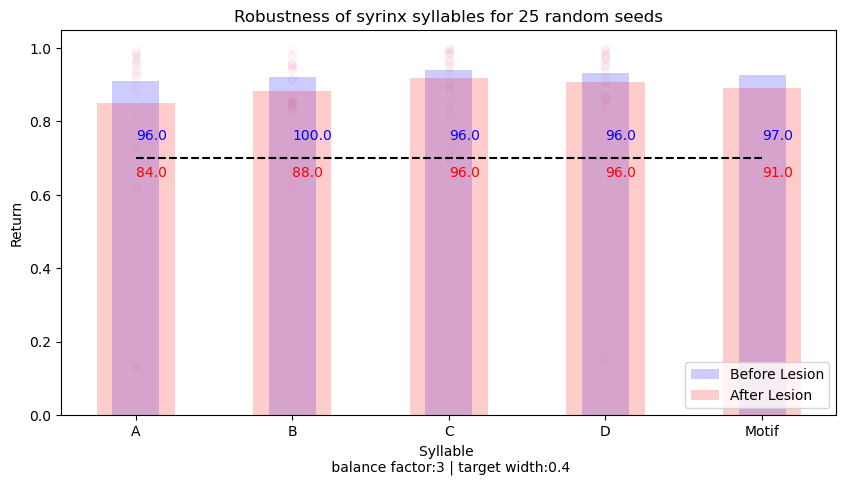

In [6]:
plt.figure(figsize=(10, 5))
# above 0.7 count as success total count
success_before = np.zeros(4)
success_after = np.zeros(4)
for i in range(4):  
    success_before[i] = len(np.where(total_returns[:, 0, i] > 0.7)[0])/total_returns.shape[0]*100
    success_after[i] = len(np.where(total_returns[:, 1, i] > 0.7)[0])/total_returns.shape[0]*100    
    plt.text(i, 0.75, str(success_before[i]), color='b')
    plt.text(i, 0.65, str(success_after[i]), color='r')
plt.text(4, 0.75, str(success_before.mean()), color='b')
plt.text(4, 0.65, str(success_after.mean()), color='r')
plt.hlines(0.7, 0, 4, color='k', linestyles='--')
for i in range(4):
    plt.plot(i*np.ones_like(total_returns[:, 0, i]), total_returns[:, 0, i], 'x', alpha = 0.01, color='b')
    plt.plot(i*np.ones_like(total_returns[:, 1, i]), total_returns[:, 1, i], 'o', alpha = 0.01, color='r')
plt.bar(np.arange(4), np.mean(total_returns[:, 0, :], axis=0), color='b', alpha=0.2, width=0.3, label='Before Lesion')
plt.bar(4, np.mean(total_returns[:, 0, :], axis=0).mean(), color='b', alpha=0.2, width=0.3)
plt.bar(4, np.mean(total_returns[:, 1, :], axis=0).mean(), color='r', alpha=0.2, width=0.5)
plt.bar(np.arange(4), np.mean(total_returns[:, 1, :], axis=0), color='r', alpha=0.2, width=0.5, label='After Lesion')   
plt.xticks(np.arange(5), ['A', 'B', 'C', 'D','Motif'])  
plt.ylabel('Return')    
plt.xlabel(f'Syllable \n balance factor:{parameters['params']['balance_factor']} | target width:{parameters['params']['TARGET_WIDTH']}')
plt.legend(loc="lower right")
plt.title(f'Robustness of syrinx syllables for {total_returns.shape[0]} random seeds')
plt.show()